## **Plantilla**

In [1]:
import pandas as pd

ruta = "https://raw.githubusercontent.com/VillaltaE/netflix_churn/refs/heads/main/netflix_customer_churn.csv"
df = pd.read_csv(ruta)

model_cols = [
    "subscription_type",
    "watch_hours",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles",
    "avg_watch_time_per_day",
    "payment_method"
]

X = df[model_cols]
y = df["churned"]

X.head(), y.value_counts(normalize=True)


(  subscription_type  watch_hours  last_login_days  monthly_fee  \
 0             Basic        14.73               29         8.99   
 1          Standard         0.70               19        13.99   
 2          Standard        16.32               10        13.99   
 3           Premium         4.51               12        17.99   
 4          Standard         1.89               13        13.99   
 
    number_of_profiles  avg_watch_time_per_day payment_method  
 0                   1                    0.49      Gift Card  
 1                   5                    0.03      Gift Card  
 2                   2                    1.48         Crypto  
 3                   2                    0.35         Crypto  
 4                   2                    0.13         Crypto  ,
 churned
 1    0.503
 0    0.497
 Name: proportion, dtype: float64)

## **Importar lo necesario**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt



## **Definir columnas por tipo**



In [3]:
categorical_cols = ["subscription_type","payment_method"]
numeric_cols = [
    "watch_hours",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles",
    "avg_watch_time_per_day"
]


## **Crear el preprocesador**

In [4]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


## **Train/Test split (80/20)**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((4000, 7), (1000, 7))

## **Armar el pipeline**

In [6]:
#Se usaran los modelos "Logistic Regression" y "Random Forest"
lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForest(max_depth=5))
])

## **Linear Regression**

## **Entrenar**

In [7]:
lr.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subscription_type',
                                                   'payment_method']),
                                                 ('num', 'passthrough',
                                                  ['watch_hours',
                                                   'last_login_days',
                                                   'monthly_fee',
                                                   'number_of_profiles',
                                                   'avg_watch_time_per_day'])])),
                ('model', LogisticRegression(max_iter=1000))])

## **Evaluar**

### Reporte de clasificación

In [8]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       497
           1       0.88      0.91      0.90       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [9]:
#Crear copia de y_pred y llamrla y_pred_lr
y_pred_lr = y_pred

###  Matriz de confusión

In [10]:
print(confusion_matrix(y_test, y_pred_lr))

[[436  61]
 [ 45 458]]


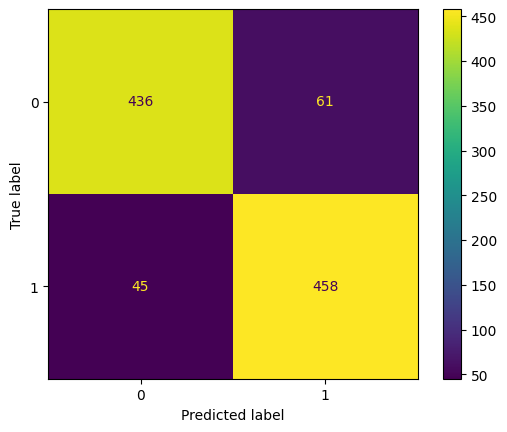

In [11]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr))
visualizacion.plot();

### Precisión

In [12]:
print(f'La precision del modelo es:{accuracy_score(y_test, y_pred_lr)}')

La precision del modelo es:0.894


## **Random Forest**

### **Entrenar**

In [13]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subscription_type',
                                                   'payment_method']),
                                                 ('num', 'passthrough',
                                                  ['watch_hours',
                                                   'last_login_days',
                                                   'monthly_fee',
                                                   'number_of_profiles',
                                                   'avg_watch_time_per_day'])])),
                ('model', RandomForestClassifier(max_depth=5))])

## **Evaluar**

### Reporte de clasificación

In [14]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       497
           1       0.94      0.97      0.96       503

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.95      1000



In [15]:
#crear copia de y_pred y llamarla y_pred_rf
y_pred_rf = y_pred

### Matriz de confusión

In [16]:
print(confusion_matrix(y_test, y_pred_rf))

[[465  32]
 [ 13 490]]


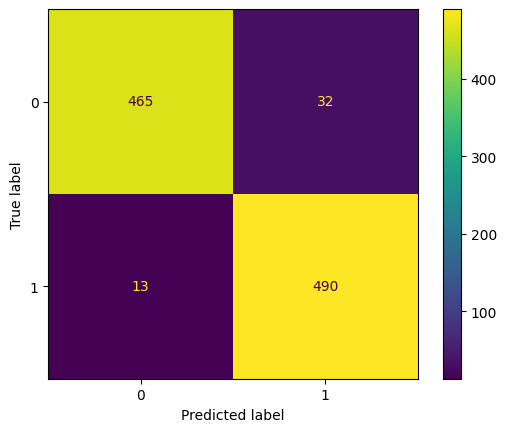

In [17]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf))
visualizacion.plot();

### Precisión

In [18]:
print(f'La precision del modelo  es:{accuracy_score(y_test, y_pred_rf)}')

La precision del modelo  es:0.955


### Curva ROC ambos modelos, comparando con uno sin habilidades

In [19]:
#Gráfico alternativo de la curva ROC
# Generar un predictor sin habilidad
ns_probs = [0 for _ in range(len(y_test))]

# Calculo de la métrica auc
#Predictor sin habilidad
ns_auc = roc_auc_score(y_test, ns_probs)
#Predictor Linear Regression
lr_auc = roc_auc_score(y_test, y_pred_lr)
#Predictor Random Forest
rf_auc = roc_auc_score(y_test, y_pred_rf)

# Cáculo de la curva roc
ns_fpr, ns_tpr, t = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, t = roc_curve(y_test, y_pred_lr)
rf_fpr, rf_tpr, t = roc_curve(y_test, y_pred_rf)

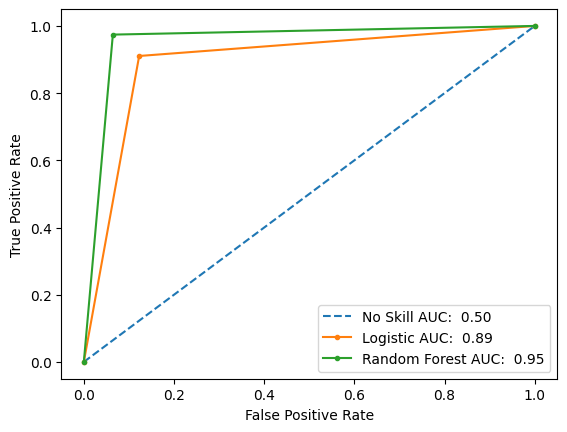

In [20]:

# Calculate rf_auc since it was not defined before
rf_auc = roc_auc_score(y_test, y_pred_rf)
lr_auc = roc_auc_score(y_test, y_pred_lr)

#Gráfico de la curva ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill AUC: {ns_auc: .2f}')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Logistic AUC: {lr_auc: .2f}')
plt.plot(rf_fpr,rf_tpr,marker='.',label=f'Random Forest AUC: {rf_auc: .2f}')

# Etiquetas de los ejes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Mostrar la leyenda
plt.legend()
# Mostrar el gráfico
plt.show()

#### Los dos modelos tienen buenos resultados. Aunque la precisión del modelo Random Forest es ligeramente mayor que la del modelo Logistic Regression (LR) , se seleccionará el modelo LR, porque es mucho más sencillo de explicar a los tomadores de decisión mediante una ecuación, ejemplo: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon$$

El modelo de Logistic Regression calcula la probabilidad de evasión de un cliente por medio de la siguiente ecuación:

$$P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_n X_n)}}$$

donde  β0  es el intercepto de la regresión y  β1 ,  β2  ...  βn  son los coeficientes de las variables predictoras.

## **Curva Precisión Sensibilidad**

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

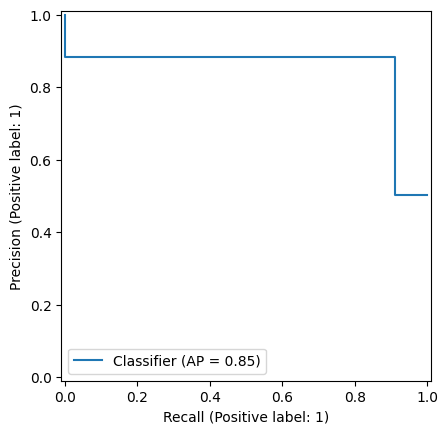

In [22]:
#Modelo Linear Regression
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr)

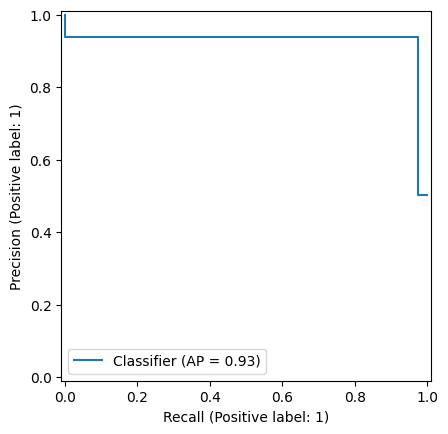

In [23]:
#Modelo Random Forest
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf)

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [25]:
#Cálculo de las métricas recall y precisión
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_lr)
rf_precision,rf_recall, _ = precision_recall_curve(y_test,y_pred_rf)
av_pre_score_lr = round(average_precision_score(y_test, y_pred_lr),3)
av_pre_score_rf = round(average_precision_score(y_test, y_pred_rf),3)
no_skill = len(y_test[y_test==1]) / len(y_test)

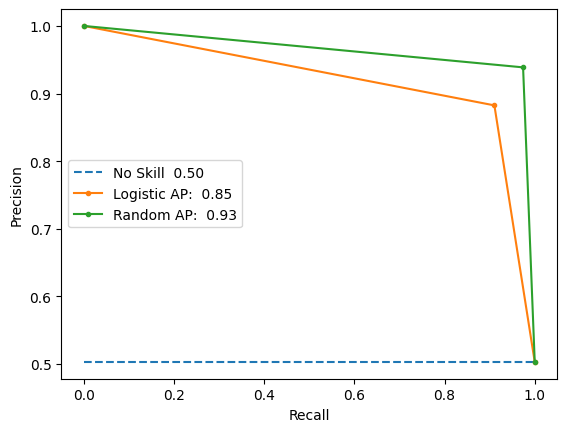

In [26]:
#Gŕafico de curva precision sensibilidad para LR y RF comparado con no skill
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label=f'No Skill {no_skill: .2f}')
plt.plot(lr_recall, lr_precision, marker='.', label= f'Logistic AP: {av_pre_score_lr: .2f}')
plt.plot(rf_recall, rf_precision, marker='.', label= f'Random AP: {av_pre_score_rf: .2f}')


plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

plt.show()


### Interpretación de las métricas y gráficos

En el gráfico ROC, observamos que el modelo tiene una excelente capacidad para distinguir entre las dos clases de churn, respaldado por un AUC de 0.85. Esto significa que el modelo es altamente eficaz separando a los clientes que se irán de los que se quedarán.

Otro aspecto crítico es la estabilidad del modelo: como se ve en la curva Precisión vs Sensibilidad (Recall), a medida que aumentamos la sensibilidad para capturar a más clientes en riesgo, la precisión no decae bruscamente, sino que se mantiene constante y en un valor muy alto, cercano al 90%.

En conclusión, el modelo logra un balance óptimo entre precisión y sensibilidad, permitiéndonos identificar al 90% de los desertores con un margen de error mínimo. Este rendimiento global se resume en el Puntaje Promedio de Precisión (AP) de 0.85, lo que garantiza una alta rentabilidad en las acciones de retención.

### Análisis de importancia de características

#### Regresión Logística

In [27]:
#Coeficientes de la regresión
coeficientes = lr.named_steps['model'].coef_[0]

In [28]:
#Obtener nombres de las columnas
columnas = lr.named_steps['preprocess'].get_feature_names_out()

In [29]:
#Crear df con los coeficientes de la regresión
lr_coef = pd.DataFrame({'Características': columnas, 
                        'Coeficientes': coeficientes})

lr_coef = lr_coef.sort_values(by='Coeficientes', ascending=False)

In [30]:
print('---Características que influyen positivamente  en la baja del servicio--')
print('')
print(lr_coef.head())

---Características que influyen positivamente  en la baja del servicio--

                  Características  Coeficientes
4      cat__payment_method_Crypto      1.110232
6   cat__payment_method_Gift Card      0.987470
1  cat__subscription_type_Premium      0.331219
0    cat__subscription_type_Basic      0.320441
9            num__last_login_days      0.125015


In [31]:
print('\n ---Características que retienen a los clientes---')
print('')
print(lr_coef.tail(5))


 ---Características que retienen a los clientes---

                    Características  Coeficientes
7        cat__payment_method_PayPal     -0.639397
2   cat__subscription_type_Standard     -0.650262
11          num__number_of_profiles     -0.834585
5    cat__payment_method_Debit Card     -0.843945
12      num__avg_watch_time_per_day     -2.791203


In [32]:
from sklearn.inspection import permutation_importance


In [33]:
X_test_transform = lr.named_steps['preprocess'].transform(X_test)

In [34]:
lr_import = permutation_importance(lr.named_steps['model'], X_test_transform, y_test)

In [35]:
lr_imp = pd.DataFrame({
    'Caracteristica': columnas,
    'Importancia': lr_import['importances_mean']
}).sort_values(by='Importancia', ascending=False)

In [36]:
print('---Top 5 de la importancia   de característica---')
print(lr_imp.head(5))

---Top 5 de la importancia   de característica---
                 Caracteristica  Importancia
8              num__watch_hours       0.1602
9          num__last_login_days       0.1062
12  num__avg_watch_time_per_day       0.0720
11      num__number_of_profiles       0.0316
10             num__monthly_fee       0.0252


### Random Forest

In [37]:
X_test_transform = rf.named_steps['preprocess'].transform(X_test)

In [38]:
rf_import = permutation_importance(rf.named_steps['model'], X_test_transform, y_test)

In [39]:
rf_imp = pd.DataFrame({
    'Caracteristica': columnas,
    'Importancia': rf_import['importances_mean']
}).sort_values(by='Importancia', ascending=False)

In [40]:
print('---Top 5 de la importancia   de característica---')
print(rf_imp.head(5))

---Top 5 de la importancia   de característica---
                 Caracteristica  Importancia
12  num__avg_watch_time_per_day       0.2548
9          num__last_login_days       0.0802
8              num__watch_hours       0.0704
11      num__number_of_profiles       0.0460
10             num__monthly_fee       0.0210


En el análisis de importancia de características ambos modelos convergen en asignarle mayor importancia a las características de comportamiento del cliente. 

En el top 5 de ambos modelos se repiten las cinco caracteristicas de uso. Sin embargo, lo que no se conserva es el orden. Por ejemplo, en el algoritmo Ramdom Forest la característica más importante es el número promedio de horas vistas, mientras que en la Regresión Logística es el número de horas vistas. 

Destacable del análisis es que tanto la Regresión Logística como el Random Forest relacionan la cancelación del servicio principalmente con el comportamiento de los usuarios. Esto es realmente importante ya que indica sobre las acciones que debe tomar el equipo de marketing.

### Añadiendo categorías de riesgo según probabilidades de cancelación

In [41]:
df_riesgo = X_test.copy()

In [42]:
df_riesgo['prob_churn'] = lr.predict_proba(X_test)[:,1]

In [53]:
df_riesgo['riesgo'] = pd.cut(df_riesgo['prob_churn'], 
                             bins=[0, 0.35, 0.70, 1.0], 
                             labels=['bajo', 'medio', 'alto'])

In [54]:
df_riesgo.head()

,subscription_type,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,payment_method,prob_churn,riesgo
1911,Standard,26.05,21,13.99,4,1.18,PayPal,0.000038,bajo
3551,Premium,2.34,54,17.99,4,0.04,Credit Card,0.982740,alto
1241,Basic,6.06,30,8.99,4,0.20,Credit Card,0.859950,alto
3182,Basic,9.44,46,8.99,2,0.20,PayPal,0.988663,alto
3678,Premium,0.10,20,17.99,1,0.00,Crypto,0.991722,alto


### Caracterizar los segmentos de riesgo de cancelación

In [55]:
# Según las variables de comportamiento
df_riesgo.groupby('riesgo', observed=True)[['watch_hours', 
                             'last_login_days', 
                             'monthly_fee', 
                             'number_of_profiles',
                             'avg_watch_time_per_day']].mean()

,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day
riesgo,,,,,
bajo,20.247424,21.135831,14.582506,3.236534,1.751593
medio,7.584880,25.456000,14.134000,3.112000,0.293440
alto,5.111406,39.810268,12.675268,2.758929,0.132143


In [56]:
# Según las variables demográficas
df_riesgo.groupby('riesgo', observed=True)[['subscription_type', 'payment_method']].agg(pd.Series.mode)



,subscription_type,payment_method
riesgo,,
bajo,Premium,Debit Card
medio,Premium,PayPal
alto,Basic,Crypto


Los clientes pueden ser segmentados en tres grupos según el riesgo de cancelación del servicio. Estos grupos son:

* Riesgo Bajo.
* Riesgo Moderado.
* Riesgo Alto.

El grupo de riesgo bajo se caracteriza por haber visto en promedio 20 horas, por acceder la última vez hace 20 días, por tener una media de promedio de horas vistas por día de 1.80 aproximadamente. Además, la mayoría de los clientes de esta categoría poseen la suscripción premium y pagan con débito.

Por otra parte, las principales características de los clientes de riesgo moderado son:

* Horas vistas promedio: 8.14hs.
* 26 días promedio de último acceso a la plataforma.
* Una media de  0.30 de horas vistas por día promedio.
* Suscripción estándar.
* Método de pago Paypal.

Por último, el segmento de riesgo alto se caracterizan por:

* Horas vistas promedio: 5hs.
* 40 días promedio de último acceso a la plataforma.
* Suscripción básico.
* Método de pago Crypto.


#### Acciones recomendadas 

El sistema debería tener como señal de alerta el umbral  de horas vistas o horas vistas por día promedio  y últimos días de acceso a la plataforma del segmento riesgo moderado. 

Recomendamos aplicar estragegias según el tipo de perfil. El cliente de riesgo moderado se le podría enviar noticias sobre contenido nuevo para que el cliente se sienta nuevamente interesado por la plataforma. Para el cliente de riesgo alto, recomendamos enviarle una oferta del tipo de plan, por ejemplo ofrecer 2 meses al precio de uno solo o a la mitad de precio. Otra opción podría ser, enviar una prueba gratuita de un plan superior al básico. Dado que, según el análisis de importancia, los clientes no tienen problemas financieros.



## **Serializamos el modelo**

In [57]:
import pickle

with open('modelo.pkl', 'wb') as archivo:
    pickle.dump(lr, archivo)

## **Cargamos el modelo**

In [58]:
with open('modelo.pkl', 'rb') as archivo:
    lr = pickle.load(archivo)

## **Probabilidades / API**

In [59]:
#Probabilidad de que un cliente se vaya (churn=1)
y_proba = lr.predict_proba(X_test)[:, 1]
y_proba[:10]


array([3.77595677e-05, 9.82739993e-01, 8.59950372e-01, 9.88662791e-01,
       9.91722111e-01, 9.85591452e-01, 9.37485986e-01, 9.99969259e-01,
       3.82384750e-01, 8.23116640e-01])

In [60]:
def predict_cliente(input_dict):
    import pandas as pd

    df_input = pd.DataFrame([input_dict])

    proba = lr.predict_proba(df_input)[0, 1]
    pred = "Va a cancelar" if proba >= 0.5 else "Va a continuar"

    return {
        "prevision": pred,
        "probabilidad": round(float(proba), 3)
    }


## **Función de predicción**

### Probar con un cliente / Manual

In [61]:
cliente_ejemplo = {
    "subscription_type": "Standard",
    "watch_hours": 7,
    "last_login_days": 19,
    "monthly_fee": 7,
    "number_of_profiles": 1,
    "avg_watch_time_per_day": 2,
    "payment_method": "Paypal"
}
predict_cliente(cliente_ejemplo)


{'prevision': 'Va a continuar', 'probabilidad': 0.1}